### El arbol de decisiones nos permite generar una diferenciacion de datos basado en las caracteristicas de los datos
Es un algoritmo de clasificacion pero que se puede usar para regresion.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris #Datos de canser y otros datos de iris
from sklearn.model_selection import train_test_split #Forma de organizar los datos
from sklearn.tree import export_graphviz #Por debajo es todo para graficar.
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris=load_iris()

In [3]:
X_ent,X_test,Y_ent,Y_test=train_test_split(iris.data, iris.target)

In [4]:
arbol=DecisionTreeClassifier()

In [5]:
arbol.fit(X_ent,Y_ent)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
arbol.score(X_test, Y_test)

0.9736842105263158

In [7]:
arbol.score(X_ent, Y_ent)

1.0

Notamos arriba que si tenemos un 100% de coincidencia con los datos de entrenamiento
no siempre es muy bueno porque puede que la red este sobre entrenada
lo que se denomina overfiting.

Por debajo escribimos un codigo que nos devuelve un archibo.tod que contiene toda la informacion del arbol que creamos

In [8]:
export_graphviz(arbol, out_file='arbol.dot',class_names=iris.target_names,
                feature_names=iris.feature_names,impurity=False,filled=True)

In [9]:
with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render ('arbol1', view=True, format='png')

'arbol1.png'

Aqui vamos a analizar la importancia de cada dato en la diferenciacion de data iris para luego saber como ajustar los datos.
plt.barh(range(caracteristica),arbol.feature_importances_)
Luego vamos a graficarlo

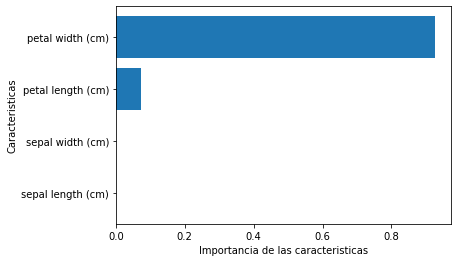

In [10]:
caracteristica=iris.data.shape[1]
plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica), iris.feature_names)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristicas')
plt.show()

Cambiamos la maxima profundidad, como se veia en la imagen hay como 6 niveles de discriminacion en el arbol. <b>Por lo que reducimos a 3 niveles</b>

In [11]:
arbol=DecisionTreeClassifier(max_depth=3)

In [12]:
arbol.fit(X_ent,Y_ent)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
arbol.score(X_test,Y_test)

0.9736842105263158

In [14]:
arbol.score(X_ent,Y_ent)

0.9732142857142857

Volvemos a generar las graficas de arbol y de caracteristicas y vemos que cambian los parametros de medida dandole importancia a un solo parametro. 

In [15]:
export_graphviz(arbol, out_file='arbol.dot',class_names=iris.target_names,
                feature_names=iris.feature_names,impurity=False,filled=True)

In [16]:
with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render ('arbol2', view=True, format='png')

'arbol2.png'

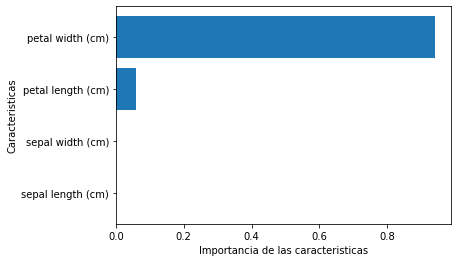

In [17]:
caracteristica=iris.data.shape[1]
plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica), iris.feature_names)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristicas')
plt.show()

### El proximo codigo intentara ver como clasifico los datos el algoritmo. de esa manera podremos ver si sobre entreno los datos al notar inconsistencias en la grafica.

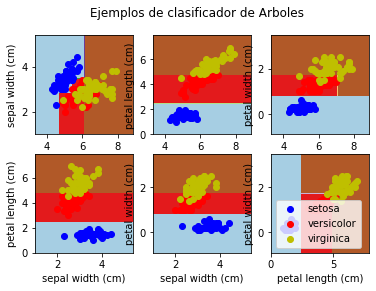

In [18]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairdx,pair in enumerate ([[0, 1], [0, 2], [0, 3], 
                              [1, 2], [1, 3], [2, 3]]):
    x=iris.data[:, pair]
    y=iris.target
    
    #Entrenar algorietmo
    clf=DecisionTreeClassifier(max_depth=3).fit(x,y) #Aqui notamos que ya indicamos la profundidad en 3
    
    plt.subplot(2, 3, pairdx + 1)
    
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                         np.arange(y_min, y_max, plot_step))
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    
    #Graficar los puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(x[idx, 0], x[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
        
    plt.axis("tight")
    
plt.suptitle("Ejemplos de clasificador de Arboles")
plt.legend()
plt.show()